# **PREDICTION OF THE S&P500 USING MACHINE LEARNING**

In this project, i'll demonstrate how to predict tomorrow's S&P 500 index price using historical data.  We'll also learn how to avoid common issues that make most stock price models overfit in the real world.

Install yFinance

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 10.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


**Downloading the S&P500 Price Data**

We'll import the yfinance package that prompts the Yahoo API to download daily stock and Index prices. We will be using the ticker symbol **GSPC**

In [17]:
import yfinance as yf

sp500 = yf.Ticker("^GSPC")

We'll next query our historical data using the history function.This will retrieve data since inception of the S&P Index market

In [18]:
sp500 = sp500.history(period= 'max')

sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


In [19]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
               '2022-05-20', '2022-05-23', '2022-05-24', '2022-05-25',
               '2022-05-26', '2022-05-27'],
              dtype='datetime64[ns]', name='Date', length=18220, freq=None)

The index values here represent the trading days

**CLEANING AND VISUALIZING OUR STOCK MARKET DATA**

We'll begin by plotting the Closing Price against the Index.

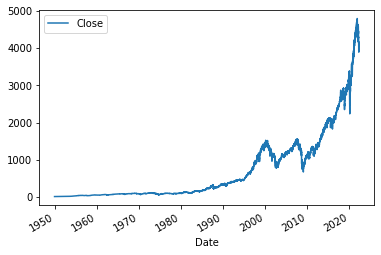

In [20]:
sp500.plot.line(y='Close', use_index= True)

Data Cleaning: We'll remove the unecessary columns that we don't need in our project, they include;

1.   Dividends
2.   Stock Splits


These columns are appropriate for indivual stocks but not for the S&P500

In [21]:
del sp500['Dividends']

del sp500['Stock Splits']

**SETTING UP OUR TARGET FOR MACHINE LEARNING**

Feature Engineering

We want to create a new column that will include price of the next closing day row to our current row for us to conduct our ML model.
So we have a column that has tomorrow's price

In [22]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [23]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,16.850000
1950-01-04,16.85,16.85,16.85,16.85,1890000,16.930000
1950-01-05,16.93,16.93,16.93,16.93,2550000,16.980000
1950-01-06,16.98,16.98,16.98,16.98,2010000,17.080000
1950-01-09,17.08,17.08,17.08,17.08,2520000,17.030001


Our target is what we are trying to predict with Machine Learning where we will determine if our tomorrow's price is greatr than today's price.
The target column is converted from Boolean to Integer where;


1.   1 = When price went up
2.   0 = When price went down



In [24]:
sp500['Target'] = (sp500['Tomorrow']> sp500['Close']).astype(int)

In [25]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,16.850000,1
1950-01-04,16.85,16.85,16.85,16.85,1890000,16.930000,1
1950-01-05,16.93,16.93,16.93,16.93,2550000,16.980000,1
1950-01-06,16.98,16.98,16.98,16.98,2010000,17.080000,1
1950-01-09,17.08,17.08,17.08,17.08,2520000,17.030001,0


Next, we're going to remove all Data that came before 1990, since there would have been alot of (fundamental) factors that would have affected past data which may affect our current model.

In [27]:
sp500 = sp500.loc['1990-01-01':].copy()

In [28]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3392770000,3941.479980,0
2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3901640000,3978.729980,1
2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,4322190000,4057.840088,1


**TRAINING OUR INITIAL MACHINE LEARNING MODEL**

In training of our model, we will be using the RandomForestClassifier because of the following reasons;


1.   Random Forests are resistant to overfitting (as compared to others)
2.   They compute relatively quickly 
3.   They can pick non-linear tendancies in the data










In [30]:
from sklearn.ensemble import RandomForestClassifier 

model  = RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)

train = sp500.iloc[:-100]

test = sp500.iloc[-100:]

predictors = ['Close','Volume','Open','High','Low']

model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

Next step, we'll be looking to measure how accurate our model is.


We will use the precision_score to determine accuracy.


Precision_score : When we said that the market would go up, did it actually go up.

In [31]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [34]:
import pandas as pd

preds = pd.Series(preds, index = test.index)

In [35]:
preds.head()

Date
2022-01-05    0
2022-01-06    1
2022-01-07    1
2022-01-10    1
2022-01-11    0
dtype: int64

In [36]:
precision_score(test['Target'], preds)

0.43820224719101125

This is not a good score since we would be better off holding our money than investing using this model.

Let's plot our actual values against our predicted values to see how the model performed.

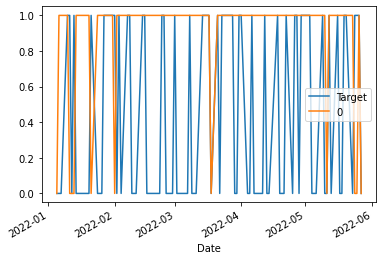

In [37]:
combined  = pd.concat([test['Target'],preds], axis=1)

combined.plot()

The 0(orange) is our predictions while Target is the actual value. We mostly predicted that the model would go up but in real sense it was actually going down.

## **BUILDING A BACKTESTING SYSTEM**

We want to be able to look at the robustness of our model and how it can handle various situations. This gives us more confidence that it would work better in the future.

We will be building a simple function that will incoroporate all the features we will be using in development of the model

In [38]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train['Target'])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name='Predictions')
  combined = pd.concat([test['Target'], preds], axis=1)
  return combined


The backtest model takes in the S&P500 data, our machine learning model, our predictors, start value and step value.

When backtesting, we want to train our model with a certain amount of data, every trading year has 250  days so the start parameter says, 'Take 10 years of data and train your first model'.The step is 250, which means we will be training our model for a year and going to the next year.

So the function will be training on the first 10 years then predict on the 11th year.Then take 11 years of our data and predict the 12th year, and so on.

In [39]:
def backtest(data, model, predictors, start=2500, step =250):
  all_predictions = []

  for i in range(start, data.shape[0],step):
    train = data.iloc[0:i].copy()             # all of the years prior to the current year
    test = data.iloc[i:(i+step)].copy()       # current year
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

Let's backtest our prediction.

This will show us how my many predictions went up vs down.

In [40]:
predictions = backtest(sp500, model, predictors)

predictions['Predictions'].value_counts()

0    3323
1    2343
Name: Predictions, dtype: int64

Let's also determine accuracy using our Precision Score.

In [41]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5356380708493385

Let's look at the percentage of days that the actaul market went up.

In [43]:
predictions['Target'].value_counts()/ predictions.shape[0]

1    0.537063
0    0.462937
Name: Target, dtype: float64

**ADDING ADDITIONAL PREDICTORS TO OUR MODEL**

Would like add more predictors to our model to see if the accuracy will increase.

We'll create a variety of rolling averages, which we will provide various horizons to determine the likelihood of the market going up in respect to the time horizon.

In [44]:
horizons = [2,5,60,250,1000]

new_predictors=[]

for horizon in horizons:
  rolling_averages= sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio{horizon}"
  sp500[ratio_column] = sp500['Close']/rolling_averages['Close']

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']

  new_predictors += [ratio_column, trend_column]

In [45]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio)2,Trend_2,Close_Ratio)5,Trend_5,Close_Ratio)60,Trend_60,Close_Ratio)250,Trend_250,Close_Ratio)1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN


  There are alot of NaN, this is because pandas cannot find enough rows or days which is prior to the current row when computing the rolling averages.

  We'll just remove these rows using the dropna function.

In [48]:
sp500 = sp500.dropna()
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio)2,Trend_2,Close_Ratio)5,Trend_5,Close_Ratio)60,Trend_60,Close_Ratio)250,Trend_250,Close_Ratio)1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


## **IMPROVING OUR MODEL**

So on our model, we'll make some few adjustments on our parameters;



1.   Increase n_estimators to 200
2.   Reduce mean_sample_split to 50



We'll rewrite our prediction function slightly.

We want to give some control over what qualifies to be a 0 or 1.


The predict_proba will be essential in this process.

In [54]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50,random_state =1)

In [55]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train['Target'])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds>=.6]=1            #probability that the market will go up by 60%
  preds[preds<.6]=0             #probability that the market will go down by 60%
  preds = pd.Series(preds, index=test.index, name='Predictions')
  combined = pd.concat([test['Target'], preds], axis=1)
  return combined

The function reduces the number of trading days by only focusing on days that the market has a likelihood of either going up or down, hence bringing more confidence in the model.

In [56]:
predictions = backtest(sp500, model,new_predictors)

In [52]:
predictions['Predictions'].value_counts()

0.0    4355
1.0     310
Name: Predictions, dtype: int64

From this we can determine that we should buy on fewer days and sell on more days since there's higher likelihood.

In [53]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5870967741935483

# **Conclusion**

Based on the new adjustments which have been applied on the model, we notice that the new features( rolling averages) did improve the accuracy of the model up to 59% which is far much better than the original model.

So from my point of view, the lesser the days of trading...the more money you are likely to make, assuming you are a Bull.If you are a Bear, the more the days you trade...the more money you make.

1.   Bull: Buyers in the Market
2.   Bears: Sellers in the Market

